In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [12]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [13]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(42000, 785)

No. of images = 42000

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [17]:
data.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

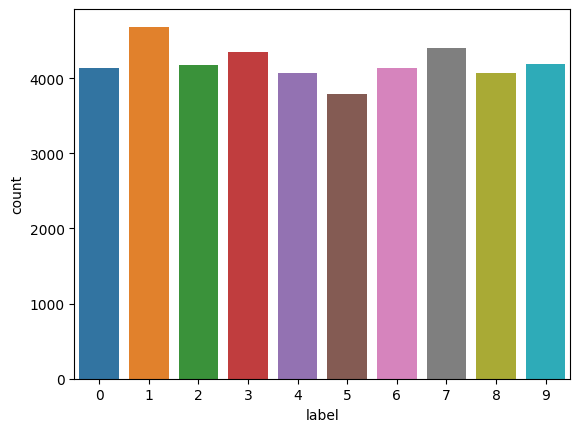

In [18]:
import seaborn as sns 
sns.countplot(data = data , x = 'label',)

In [19]:
data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13352,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


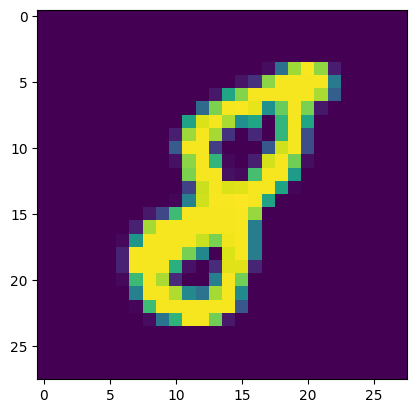

In [23]:
import matplotlib.pyplot as plt
plt.imshow(data.iloc[13352,1:].values.reshape(28,28))

In [25]:
data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11439,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


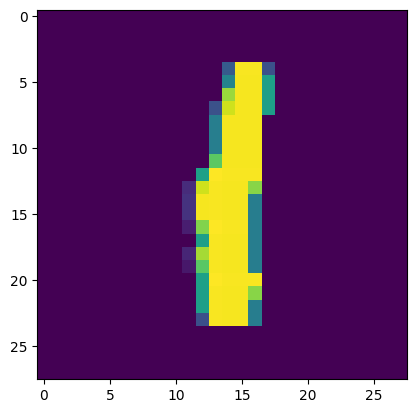

In [27]:
plt.imshow(data.iloc[11439,1:].values.reshape(28,28))

In [33]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [35]:
X.shape

(42000, 784)

In [38]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X,y, test_size =.20 , random_state =40)

In [37]:
X_train.shape

(33600, 784)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9636904761904762


In [42]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

In [55]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [56]:
knn= KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)

In [58]:
print(accuracy_score(y_pred , y_test))

0.9470238095238095


**Visualization**

In [61]:
pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [63]:
import plotly.express as px
y_train.trf = y_train.astype(str)
fig = px.scatter(x=X_2d[: ,0] ,y = X_2d[:,1], color = y_train.trf, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [69]:
pca = PCA(n_components = 3)
X_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [71]:
import plotly.express as px
y_train.trf = y_train.astype(str)
fig = px.scatter_3d(x=X_2d[: ,0] ,y = X_2d[:,1],  z= X_2d[:, 2] ,color = y_train.trf )
fig.update_layout(
    margin = dict(l=20, r=20, b=20)

)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

